# Laboratorio de SPICE
### Fundamentos Físicos de la Informática

__Nombre:__ José Flores Arias

__Fecha:__ 06 - 01 - 2021


 # Objetivo del laboratorio
 El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE) y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.

 # El estándar SPICE
 **SPICE** es una abreviabiación de *Simulation Program with Integrated Circtuit Emphasis*.
 Se trata básicamente de un método estándar para describir circuitos usando texto plano en
 lugar de una representación gráfica (o *esquemática*). A esta descripción en texto se
 la llama también **netlist** y básicamente se corresponde con la *lista* de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión.
 Los ficheros netlist pueden tener extensiones `.cir`, `.net`, `.ckt`, ó `.sp` y es muy común encontrárselos con cualquiera de estas.

 Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito
 en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta *open source* y regidos por distintas comunidades de usuarios y programadores.

> **Pregunta:** Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:

| Intérprete      | Licencia             | Fabricante                                     | Características                             | Ver más                                                                                     |
|-----------------|----------------------|------------------------------------------------|---------------------------------------------|---------------------------------------------------------------------------------------------|
| Ahkab           | GPL                  | Giuseppe Venturini                             | Basado en Python                            | https://ahkab.github.io/ahkab/                                                              |
| PSpice          | Comercial            | OrCAD                                          | Compatible con Simulink                     | https://www.pspice.com/                                                                     |
| SPICE OPUS      | Comerial/Free        | Faculty on Electrical Engineering of Ljubljana | Posee compilados para Windows y Linux       | http://www.spiceopus.si/                                                                    |
| intusoft        | Comercial            | Intusoft                                       | Soporta SO Windows 10 y 64 bits             | http://www.intusoft.com/index.php                                                           |
| SIMetrix        | Portable/LAN/WAN     | SIMextrix Technologies Ltd.                    | Tiene su propio lenguaje de scripting       | https://www.simetrix.co.uk/index.html                                                       |
| TopSpice        | Comercial            | Penzar Development                             | Diseñado para windows 7/8/10                | http://penzar.com/topspice/topspice.htm                                                     |
| LTspice         | Freeware             | Analog Devices, Inc.                           | Tiene una versión para MacOS                | https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html |
| Mentor Graphics | ESD                  | Mentor, a Siemens Business                     | Es muy rápido y configurable en tiempo real | https://www.mentor.com/products/ic_nanometer_design/analog-mixed-signal-verification/       |
| Tina Pro        | Comerial             | DesignSoft, Inc.                               | Tiene traducciones a 25 idiomas             | https://www.tina.com/es/                                                                    |
| SPICE netlist   | Suscripción          | National Instruments                           | Tiene una interfaz muy amigable             | https://www.multisim.com/help/simulation/spice-netlist/                                     |
| Altium Designer | Suscripción/Perpetua | Altium Limited                                 | Es la herramienta completa de Altium        | https://www.altium.com/altium-designer/es                                                   |
| ASCO            | GPL                  | Joao Ramos (ascodev)                           | Su ultima versión salio en el 2016 (0.4v)   | http://asco.sourceforge.net/                                                                |
| gEDA            | GPL                  | Stuart Brorson                                 | Solo para linux, programado en C            | http://www.geda-project.org/                                                                |
| Gnucap          | GPL                  | Albert Davis                                   | Es interactivo y manejable desde comandos   | https://www.gnu.org/software/gnucap/gnucap.html                                             |
| MacSpice        | GPL                  | Charles D. H. Williams                         | Solo para MacOs                             | https://www.macspice.com/                                                                   |
| ngspice         | BSD                  | Justin Fisher, Dietmar Warning                 | Usado como base para otros simuladores      | http://ngspice.sourceforge.net/                                                             |
| TclSpice        | BSD                  | Adrian Dawe, Lionel Saintel                    | Tiene un lenguaje de scripting Tcl/Tk       | http://tclspice.sourceforge.net/                                                            |
| QUCS            | GPL                  | Michael Margraf, Stefan Jahn                   | Mas amigable que gEDA o PSpice              | http://qucs.sourceforge.net/                                                                |


 > **Pregunta:** ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces? 

Ambas sintaxis como lenguaje de programación necesitan de un compilador o intérprete para funcionar y verificar que lo que se escribe tiene sentido y respeta las normas del estándar del lenguaje pero la gran diferencia radica en que C es un lenguaje de alto nivel capaz de generar algoritmos muy complejos de programas incluso varios interpretes de la lista anterior estan diseñados en C es decir es capaz de leer y entender el propio estandar de SPICE, por el contrario SPICE esta limitado para lo que fue creado, diseñar circuitos en un netlist para despues ser procesado por otro intérprete como Ahkab que usaremos en este laboratorio. 

Algunos compiladores de C entre los mas populares: 
- Bolarnd C++
- Turbo C
- Dev C++


 ## Elementos de un netlist
 Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

 ## Comentarios

 La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un `*`. Ejemplo:
 
 ```spice
 Mi primer circuito
 * Otro comentario
 * más comentarios
 *
 ```

 ## Dispositivos básicos de un circuito
 Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo,
 tales como resistencias, **condensadores**, **bobinas**, **interruptores**, **hilos** y **fuentes** de alimentación.
 Para distinguir uno de otro, se reserva una letra característica: `V` para fuentes de alimentación, `R` para resistencias, `C` para condensadores y `L` para bobinas. También es posible usar estas letras en su versión en minúscula (`r`, `v`, `c`, `l`, etc.).
 Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

 ```
 * Una resistencia
 R1
 *  Otra resistencia
 R2
 * Fuente de alimentación
 V
 * Un condensador
 Cprincipal
 ```

 ## Conexiones
 A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles
 son los puntos de unión tanto a un lado como al otro del elemento.
 Así es como Spice sabe qué está conectado a qué: porque comparten un **punto**
 (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos)
 que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una
 numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente
 a nuestro criterio**.

 ```
 * Una resistencia
 * entre cables 0 y 1
 R1 0 1
 ```

 **Sólo es necesario seguir un criterio**: en el caso de una
 fuente de alimentación, el nodo que pondremos primero será
 aquel que está más cerca del *borne* positivo. Ejemplo:

 ```spice
 * Para una fuente indicamos primeramente conexión a nodo positivo.
 v 2 3 type=vdc vdc=1
 ```
 
En el *caso de LTspice* no es necesario indicar los parámetros `type=vdc` y `vdc=X`, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

```spice
* Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice
v 0 1 10
```

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true)

 ## Unidades en SPICE

 Las unidades de las magnitudes características del circuito son siempre [unidades
 del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) y no es necesario indicarlo explícitamente en el netlist.

 La forma de especificar múltiplos de estas cantidades es añadiendo una letra.
 Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son `k` para "kilo-," `m` para "mili?" y `u` para "micro?".

 > **Pregunta:** Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.

 | FACTOR      | PREFIJO | SÍMBOLO |
|-------------|---------|---------|
| 1E+18       | exa     | E       |
| 1E+15       | peta    | P       |
| 1E+12       | tera    | T       |
| 1000000000  | giga    | G       |
| 1000000     | mega    | M       |
| 1000        | kilo    | k       |
| 100         | hecto   | h       |
| 10          | deca    | da      |
| 0,1         | deci    | d       |
| 0,01        | centi   | c       |
| 0,001       | mili    | m       |
| 0,000001    | micro   | μ       |
| 0,000000001 | nano    | n       |
| 1E-12       | pico    | p       |
| 1E-15       | femto   | f       |
| 1E-18       | atto    | a       |

 En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (`vdc`) o alterna (`ac`).

 ```
 * Una resistencia de 5 Ohmios
 R2 1 0 5
 * Una pila de 10 Voltios (continua)
 V1 1 0 type=vdc vdc=10
 * Una resistencia de 5 kΩ
 RX 2 4 5k
 ```

 > **Pregunta**: ¿qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.

 | Nombre SI           | Símbolo |
|---------------------|---------|
| Corriente eléctrica | I       |
| Amperio             | A       |
| Voltio              | V       |
| Vatio               | W       |
| Faradio             | F       |
| Ohmio               | Ω       |
| Tesla               | T       |
| Culombio            | C       |
| Siemens             | S       |
| Weber               | Wb      |

 ## Valores iniciales

 Aparecen justo al final de la definición del componente (`ic`). Suelen aplicarse principalmente con condensadores.

 ```
 * Una condensador inicialmente no cargado
 c 1 0 1u ic=0
 ```

 ## Fin del circuito

 El fin de la descripción de un netlist se especifica mediante el
 comando `.end`.

 ```spice
 * Mi primer circuito
 V 1 0 vdc=10 type=vdc
 R 1 0 5
 * Fin del circuito
 .end
 ```


 ## Comandos SPICE para circuitos en corriente continua

 Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué
 tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar
 la salida de la simulación. Los comandos en Spice empiezan por un `.` y suelen
 escribirse justo al final del circuito, pero antes del comando `.end`.

 ```
  Mi primer circuito
 * Aquí van los componentes
 R 1 0 6k
 ...
 * Comandos
 .op
 ...
 * Fin del circuito
 .end
 ```

 > **Pregunta**: Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta. 

Encajaría en un tipo de lenguaje procedural debido a que es un único bloque de contiguo de instrucciones.
También es estructurado, ya que basa el programa en componentes, nombrados procedimientos, subrutinas o funciones y comunican en fomra no verbal

Veamos los principales comandos de simulación:

 - `.op` es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
 - `.dc` es uy parecido al comando `.op` pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B.
 En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:


 ```spice
 * Variamos el valor del voltaje
 * de la fuente "v" de 1 a 1000
 * en pasos de 5 voltios
 v 1 0 type=vdc vdc=10
 .dc v 1 start=1 stop=1000 step=20
 v2a 2 4 type=vdc vdc=9
 * Igual para v2a. Se ignora su voltaje de 9V
 .dc v2a start=0 stop=10 step=2
 ```

 - El comando `.tran` realiza un análisis en el tiempo de los parámetros del
 circuito. Si no se emplea la directiva `uic` (*use initial conditions*) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo `tfinal`.
 y en intervalos `tstep`. Si empleamos un varlor distinto para parámetro `uic`,
 entonces se hará uso de las condiciones iniciales definidas para cada componente
  (típicamente `ic=X` en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).


 ```
 * Hacemos avanzar el tiempo entre
 * tinicial y tfinal en pasos tstep
 .tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
 ```

 `X`, `Y` y `Z` tienen, evidentemente unidades de tiempo en el S.I. (segundos).

 > **Pregunta**: El parámetro `uic` puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la [documentación de Ahkab](https://buildmedia.readthedocs.org/media/pdf/ahkab/latest/ahkab.pdf).

 UIC (Uso condiciones iniciales): se usa para especificar el estado del circuito en el momento t = tstart.Los valores disponibles son 0, 1, 2 o 3.
- uic = 0: se supondrá que todos los voltajes y corrientes de los nodos a través de fuentes v / h / e / son cero en t = tstart
- uic = 1: el estado en 't = tstart es el último resultado de un análisis OP.
- uic = 2: el estado en t = tstart es el último resultado de un análisis OP en el que se establecen los valores de corrientes a través de inductores y voltajes en condensadores especificados en su ic.
- uic = 3: carga un ic proporcionado por el usuario. Esto requiere una directiva .ic en algún lugar de la lista de conexiones, .ic y ic_label deben coincidir.

 ## Intérprete SPICE que vamos a usar: Ahkab
 Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implmentación más en Python del estándar Spice.
 > **Pregunta:** Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown. [Aquí](https://www.markdownguide.org/extended-syntax/#tables) tienes un poco de ayuda (aunque antes ya se ha puesto el ejemplo de una tabla).



 | Javascript                          |                                                                                                                                       |
|-------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| Implementaciones                    | Descripción                                                                                                                           |
| SpiderMonkey                        | En C/C++                                                                                                                              |
| Rhino                               | Escrito en Java                                                                                                                       |
| V8 de Google                        | Se utiliza en el navegador Google Chrome y las versiones recientes del navegador Opera. Este también es el motor que utiliza Node.js. |
| JavaScriptCore (SquirrelFish/Nitro) | utilizado en algunos navegadores WebKit como Apple Safari.                                                                            |
| Carakan                             | versiones antiguas de Opera.                                                                                                          |
| Motor Chakra                        | utilizado en Internet Explorer (aunque el lenguaje que implementa formalmente se lla                                                  |
      

| Nombre              | Fecha de liberación | Descripción                                                      |
|---------------------|---------------------|------------------------------------------------------------------|
| Ediciones actuales  |                     |                                                                  |
| ECMA-262 9a Edición | 2018                | Especificación del Lenguaje ECMAScript 2018                      |
| ECMA-402 5a Edición | 2018                | Especificación de la API de internacionalización

 
 > **Pregunta:** Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).

 Ahkab 0.18 fue lanzado el 17 de abril de 2017 por Giuseppe Venturini, con contribuciones de Ian Daniher, Rob Crowther y otros. , es un simulador de circuitos interactivos de tipo SPICE de código abierto, se puede utilizar desde Python como un módulo y desde el shell a través de su interfaz de línea de comandos. Con licencia GNU GENERAL PUBLIC LICENSE Version 2, June de 1991.

 # Trabajo práctico
 Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.
 ## Instalación de bibliotecas necesarias
 Si estás utilizando Anaconda, asegúrate de tener su entorno activado:
 
 ```cmd
 C:\> conda activate base (en el caso de Windows)
 ```
 ó

 ```bash
 $ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
 ```

 En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando `conda` (visita la sección de [Environment Variables](https://superuser.com/questions/949560/how-do-i-set-system-environment-variables-in-windows-10) del [Panel de Control](https://www.digitalcitizen.life/8-ways-start-control-panel-windows-10)). Si has instalado Anaconda con [esta opción](https://docs.anaconda.com/_images/win-install-options.png) marcada, ya no tienes que preocuparte por ello. 

 Ahora ya puedes instalar Ahkab:

 ```
 (base) $ pip install ahkab
 ```

 Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) como desde un entorno Jupyter (Jupyter, [Jupyterlab](http://jupyterlab.readthedocs.io/en/stable/), VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su [documentación oficial](https://nteract.io/kernels).  

In [1]:
import pylab as plt
import ahkab

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


También vamos a importar Sympy para hacer algún cálculo más *manual* más adelante:

In [3]:
import sympy.physics.units as u
from sympy.physics.units import Dimension 
from sympy import * 
from sympy.physics.units import convert_to


 > **Pregunta:** ¿Qué es y para qué sirve PyLab?

 Entre los programas para escribir, graficar y resolver matemáticas como Matlab y GNU Octave,que además son entornos completos que solucionan la vida de muchos ingenieros, físicos y matemáticos. Nace este laboratorio de python que no es una librería sino, un grupo de ellas __(numpy, scipy, sympy, pandas, matplotlib, ipython)__ que crean una suite completa donde podemos crear scripts `.py` al mismo nivel de MatLab. Gran parte de este grupo de librerías es muy usado para hacer _machine learning_ y _data sicence_.


 ## Circuitos sencillos para trabjar con la ley de Ohm:

 La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

 > **Pregunta:** comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.

__Demostración:__
Para demostrar que se ajusta corretamente dimesionalmente vamos a definir las unidades que la componen, para encontrar como se compone 1$\Omega$ cuando la diferencia de potencial es de 1$V$ y la intensidad de 1$A$.

$$ (1). \hspace{1cm} V = \frac{W}{Q} $$
$$ (2). \hspace{1cm} I = \frac{Q}{t} $$

Partiendo de __(1)__: 

$$ V = \frac{W}{Q} $$

De la definición del modelo del trabajo $W = F \cdot d$ y de __(2)__ tenemos que:
$$ [V] = \frac{[W]}{[Q]} = \frac{[F][d]}{[I][t]} $$

$$ [V] = \frac{[m][a][d]}{[I][t]} $$

$$ [V] = \frac{[M][LT^{-2}][L]}{[A][T]} $$
$$ (3). \hspace{1cm} [V] = ML^{2}T^{-3}A^{-1} $$

Entonces podemos definir  $R = \frac{V}{I}$ como:
$$ (4). \hspace{1cm} [R] = ML^{2}T^{-3}A^{-2} $$

O bien en sus magnitudes del SI:

$$ \Omega = \frac{\mbox{m}^2 \cdot \mbox{kg}}{\mbox{s}^3 \cdot \mbox{A}^2}$$

Entonces por la demostración del voltaje __(3)__ y resistencia __(4)__ tenemos que:

$$ V = I\cdot R $$
$$ ML^{2}T^{-3}A^{-1} = A \cdot ML^{2}T^{-3}A^{-2} $$
$$ ML^{2}T^{-3}A^{-1} = ML^{2}T^{-3}A^{-1} $$


Y tiene mucho sentido, es decir esta ajustada a nivel dimensional.
 
 
 


Comencemos con el circuito más sencillo posible de todos:

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

 Vamos a escribir su contenido (componentes o *netlist*) en disco con el nombre `circuito sencillo.sp`. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los *comandos mágicos* de este entorno de programación literaria. En concreto vamos a utilizar `%%writefile` que guarda los contenidos de una celda como un fichero. 

In [4]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 100
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end


Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [6]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

 Separamos la información del netlist (componentes) de los análisis (uno de tipo `op` y otro de tipo `dc`):

In [7]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


> **Pregunta:** ¿qué tipo de estructura de Python es `lista_de_análisis`?

En python se conoce como listas a algo parecido a los _arrays_ en C donde cada posisión de memoria tiene su valor, a diferencia de otros lenguajes como php que es posible crear _arrays_ con clave valor donde la posición de memoria dentro del _array_ tiene una clave para identificarla, en python a la estructura similar a estos arreglos se los conoce como diccionarios y son muy similares a escribir objetos de JavaScript `json`.

Por lo que la estuctura de `lista_de_análisis` es; una lista de diccionarios.

 Las simulaciones que implican listas de datos (`.dc`, `.tran`, etc.) necesitan de un fichero temporal (`outfile`)
 donde almacenar los resultados. Para ello tenemos que definir la propiedad `outfile`.

In [8]:
lista_de_análisis[1]['outfile'] = "simulación dc.tsv"


 > **Pregunta:** escribe el código Python necesario para identificar qué análisis de `lista_de_análisis`
 son de tipo `dc` ó `tran` y sólo añadir la propiedad `outfile` en estos casos.
Aquí tenéis un post de Stackoverflow con algo de [ayuda](https://stackoverflow.com/questions/49194107/how-to-find-index-of-a-dictionary-key-value-within-a-list-python).
 Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo `dc`. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo `tran` y/o `dc`.

In [9]:
index = [i for i, d in enumerate(lista_de_análisis) if "dc" in d.values() or "tran" in d.values()]

# Como máximo un tipo de análisis
if len(index) == 1:
    tipo = lista_de_análisis[index.pop()]['type'] # Obtengo el tipo usando index
    lista_de_análisis[1]['outfile'] = "simulación " + tipo + ".tsv" 

print('Nombre del archivo: ', lista_de_análisis[1]['outfile'])

Nombre del archivo:  simulación dc.tsv


Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método `.run` de Ahkab: 

In [10]:
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


### Resultados de la simulación `.dc`
Imprimimos información sobre la simulación de tipo `.dc`:

In [11]:
print(resultados['dc'], "\n")

# Leyendo el archivo donde se guardo la salida de resultados
with open(lista_de_análisis[1]['outfile'], 'r') as f:
    print(f.read())


<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2021-01-06 18:48:02, data file simulación dc.tsv> 

#V1	V1	I(V1)
0.000000000000000000e+00	0.000000000000000000e+00	0.000000000000000000e+00
1.000000000000000000e+00	-1.000000000000000000e+00	-1.000000000000000021e-02
2.000000000000000000e+00	-2.000000000000000000e+00	-2.000000000000000042e-02
3.000000000000000000e+00	-3.000000000000000000e+00	-2.999999999999999889e-02
4.000000000000000000e+00	-4.000000000000000000e+00	-4.000000000000000083e-02
5.000000000000000000e+00	-5.000000000000000000e+00	-5.000000000000000278e-02
6.000000000000000000e+00	-6.000000000000000000e+00	-5.999999999999999778e-02
7.000000000000000000e+00	-7.000000000000000000e+00	-7.000000000000000666e-02
8.000000000000000000e+00	-8.000000000000000000e+00	-8.000000000000000167e-02
9.000000000000000000e+00	-9.000000000000000000e+00	-8.999999999999999667e-02



 Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [12]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (`V1`) con respecto a la intensidad del circuito (`I(V1)`).

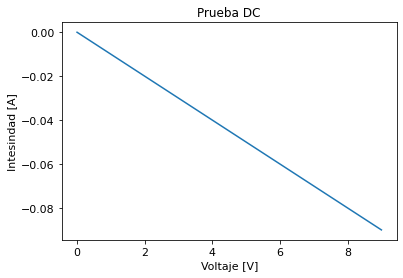

In [13]:
figura = plt.figure()
plt.title("Prueba DC")
plt.xlabel("Voltaje [V]") 
plt.ylabel("Intesindad [A]") 
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], label="Voltaje (V1)")
plt.show()

> **Pregunta:** comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede *viajar* solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. Algo de [ayuda](https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html). ¿Qué biblioteca estamos usando para graficar? Una [pista](https://matplotlib.org).

Para visualizar gráficas de histogramas, funciones, datos dispersos y muchos otros en python es muy popular la librería `matplotlib` que es la que usaremos en el resto de ejercicios y forma parte del __stack__ de PyLab.

En la gráfica `Prueba DC` mostrada anteriormente podemos ver que pasa con la intensidad de corriente respecto al voltaje aplicado con pasos de 1 en 1. El circuito está conectado de tal forma que a mayor voltaje menor será su intensidad. O podemos decir que la corriente decrece mientras el voltaje aumenta. ¿Esto tiene sentido?

Anteriormente definimos la fuente de voltaje en el circuito como: `.dc v1 start=0 stop=9 step=1` en valores positivos pero ¿por qué tiene una pendiente negativa?

Revisemos qué valores está tomando el eje Y o Intensidad.


In [14]:
print(resultados['dc']['I(V1)'])

[ 0.   -0.01 -0.02 -0.03 -0.04 -0.05 -0.06 -0.07 -0.08 -0.09]


Efectivamente son negativos.

### Resultados de la simulación .op
El método `.results` nos devuelve un diccionario con los resultados de la simulación.

In [15]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.09}


 > **Pregunta:** justifica el sencillo resultado anterior (análisis `op`). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).

In [16]:
# Importamos objetos de sympy
from sympy import solve, symbols, pi, Eq
# Importamos las unidades de sympy
from sympy. physics.units import ampere
from sympy. physics.units import volt
from sympy. physics.units import ohms
# Importamos la función convert_to para transformar unidades
from sympy.physics.units import convert_to

R = 100 * ohms
V = -9 * volt

I = symbols("Intensidad")

eq_ohm = Eq(I, V/R)
solution = solve(eq_ohm, I)
print('\n La intensidad para del circuito es: ')
convert_to(solution[0], [ampere]).n(2)


 La intensidad para del circuito es: 


-0.09*ampere

 ## Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la *palabra mágica* [`%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). 

In [17]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [18]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimos los resultados del análisis `.op`:

In [19]:
print(resultados['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2021-01-06 18:48:22, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab. 

__Demostración:__ Si confiamos en los valores que nos proporciona Ahkab usaremos la intensidad de corriente, ya que es un circuito en serie no cambia.


In [20]:
I = resultados['op']['I(V1)'][0][0] * ampere
V = symbols('V')

R = 3000 * ohms
voltaje = Eq(V, R * I)
solution = solve(voltaje, V)
print('\n El voltaje disipado en R1 es: ')

convert_to(solution[0], [volt]).n(2)


 El voltaje disipado en R1 es: 


-1.5*volt

 > **Pregunta**: reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con tun *toque computacional*). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (`r_total`). Faltarían el resto de resultados y convertirlos a unidades más *vistosas* (mediante la orden `convert_to` y `.n()`).

In [21]:
R = 10000 * ohms
voltaje = Eq(V, R * I)
solution = solve(voltaje, V)
print('\n El voltaje disipado en R2 es: ')

convert_to(solution[0], [volt]).n(2)


 El voltaje disipado en R2 es: 


-5.0*volt

In [23]:
R = 5000 * ohms
voltaje = Eq(V, R * I)
solution = solve(voltaje, V)
print('\n El voltaje disipado en R3 es: ')

convert_to(solution[0], [volt]).n(2)


 El voltaje disipado en R3 es: 


-2.5*volt

In [22]:
# Definimos la única fuente de voltaje
voltaje_fuente = 9*u.volts

# Inicializamos las resistencias
R1 = 3000 * ohms
R2 = 10000 * ohms
R3 = 5000 * ohms

R_total = R1 + R2 + R3

intensidad = symbols("I")

ley_ohm = Eq(voltaje_fuente, intensidad * R_total)

solucion_intensidad = solve(ley_ohm, intensidad)
convert_to(solucion_intensidad[0], [ampere]).n(2)

0.0005*ampere

> **Pregunta**: Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.

In [23]:
voltaje_calculado = 0

# Creo una lista de resistencias
resistencias = [R1, R2 ,R3]

for R in resistencias:
    voltaje_calculado += R * solucion_intensidad[0]

convert_to(voltaje_calculado, [volt],).n(2)

9.0*volt

Esto demuestra que la sumatoria de los voltajes que caen sobre cada resistencia es igual al voltaje que proporciona la fuente, para este caso: $9V$.

Inicialmente el `voltaje_calculado` estaba en 0 y se acumuló segun las resistencias, podemos darnos cuenta que la sumatoria del voltajes disipados en cada resistencia del circuito es igual al voltaje proporcionado por la fuente y se cumple Ley de Kirchhoff.

## Análisis `.op` de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

 > **Pregunta**: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

### Circuito 1
Definimos el netlist para el primer ejercicio.

In [29]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
vdummy1 3 4 vdc=0 type=vdc
r4 4 0 1.5k
r5 2 5 470
vdummy2 5 0 vdc=0 type=vdc

.op
.end

Overwriting resistencias en paralelo 1.cir


In [31]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila `VDD`).

In [32]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2021-01-06 18:48:53, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23533e-12    0
V3          V         -2.8215      2.82151e-12    0
V4          V         -2.8215      2.8215e-12     0
V5          V          0           0              0
I(VDD)      A         -0.00876467  0              0
I(VDUMMY1)  A         -0.001881    0              0
I(VDUMMY2)  A         -0.00688367  0              0


> **Pregunta:** inserta dos *pilas virtuales* de 0 voltios en el resto de ramas del circuito (`Vdummy1` en la rama donde está `R5` y `Vdummy2` en la rama donde está `R3` y `R4`) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde `V1`, `V2` y `V3` tienen cero voltios. Estas *pilas nulas* son, a todos los efectos, *simples cables*. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:

El netlist nuevo que tiene las dos fuentes tontas de 0 voltios quedaria de la siguiente forma:

```
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
vdummy1 3 4 vdc=0 type=vdc
r4 4 0 1.5k
r5 2 5 470
vdummy2 5 0 vdc=0 type=vdc

.op
.end

```

Donde se agregaron dos nodos nuevos __(3-4)__ y __(5-0)__  para cada fuente de voltaje, de esa forma es posible visualizar las corrientes en estos nodos.

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$


__Demostración:__



In [33]:
# Tomando las intensidades que nos proporsiona los resultados de Ahkab
intensidad_entrante = resultados['op']['I(VDD)'][0][0]
intensidades_salientes = [
    resultados['op']['I(VDUMMY1)'][0][0],
    resultados['op']['I(VDUMMY2)'][0][0]
]

print(
    'Las intensidad entrante es igual a la sumatoria de intensidades salientes? ',                      intensidad_entrante == sum(intensidades_salientes)
)

Las intensidad entrante es igual a la sumatoria de intensidades salientes?  True


Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto `resultados` alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no *copies* los números *a mano*, trabaja de manera informáticamente elegante (usando la variable `resultados`). 

### Circuito 2
Definimos el netlist para el segundo ejercicio con los poderes mágicos de jupyter `%%writefile`.

In [35]:
%%writefile "resistencias en paralelo 2.cir"
* resistencias en paralelo
v1 1 0 vdc=9 type=vdc

r1 1 2 47
r2 2 3 220
r4 3 4 1k
r5 4 5 560
vdummy 5 0 vdc=0 type=vdc

r3 2 6 180
v2 6 0 vdc=1.5 type=vdc

.op
.end

Overwriting resistencias en paralelo 2.cir


Para este caso se agregará una fuente de voltaje 0 para que Ahkab nos muestre la corriente del tercer borne como las resistencias R2, R4, R5 estan en serie la corriente no cambiará y la usaremos para calcular la diferencia de potencial en ellas.

In [36]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`.

In [38]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2.cir).
Run on 2021-01-06 18:49:02, data file None.
Variable    Units          Value         Error    %
----------  -------  -----------  ------------  ---
V1          V         9           -9e-12          0
V2          V         7.29441     -7.29442e-12    0
V3          V         6.39285     -6.39285e-12    0
V4          V         2.29487     -2.29487e-12    0
V5          V         0           -8.67362e-19    0
V6          V         1.5         -1.50002e-12    0
I(V1)       A        -0.0362891    0              0
I(VDUMMY)   A         0.00409798   0              0
I(V2)       A         0.0321912    0              0


Como se puede ver la corriente que para por las 3 resistencias R2, R4 y R5 es muy pequeño y eso tiene sentido ya que al sumar las resistencias en serie su valor sera mucho mas grande y a mayor resistencia menor corriente.

### Circuito 3
Definimos el netlist para el segundo ejercicio de nuevo con `%%writefile`.

In [39]:
%%writefile "resistencias en paralelo 3.cir"
* resistencias en paralelo
v 1 0 vdc=9 type=vdc

v1 1 2 vdc=0 type=vdc
r1 2 0 10k

v2 2 3 vdc=0 type=vdc
r2 3 0 2k

v3 3 4 vdc=0 type=vdc
r3 4 0 1k

.op
.end

Overwriting resistencias en paralelo 3.cir


En este ejercicio podemos ver que tiene 4 fuentes de voltaje y 3 de ellas estan en serie con una resistencia, si aplicamos la Ley de Kirchhoff de votajes, sabemos que existiran 3 corrientes por las 3 mallas del circuito. 

[Ver más](https://www.areatecnologia.com/leyes-de-kirchhoff/leyes-de-kirchhoff.html) sobre resolución de circuitos método de mallas.

In [40]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`.

In [41]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 3.cir).
Run on 2021-01-06 18:49:10, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V         9        -9e-12    0
V2          V         9        -9e-12    0
V3          V         9        -9e-12    0
V4          V         9        -9e-12    0
I(V)        A        -0.0144    0        0
I(V1)       A         0.0144    0        0
I(V2)       A         0.0135    0        0
I(V3)       A         0.009     0        0


Para el siguiente caso esta ocurriendo algo estraño pero si hicimos todo bien tiene mucho sentido, para entender un poco más como funciona el voltaje en paralelo imaginemos que conectamos un voltímetro en los extremos de las resistencias, nos damos cuenta que ese dispositivo de medición tambíen esta en paralelo a la fuente por lo que la caida de tensión en cada resistencia en paralelo sera el voltaje de la misma fuente.

Un ejemplo mas práctico es imaginar que conectamos 3 lámparas de la misma potencia/resistencia en serie, la caida de voltaje irá disminuyendo y la última brillará con menos intensidad, pero, sí las conectamos en paralelo a la fuente las 3 tendran la misma intensidad luminosa.

 # Circuitos en DC que evolucionan con el tiempo

 ## Carga de un condensador
 Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador
 en serie.

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

 Al igual que antes, primero guardamos el circuito en un netlist externo:

In [36]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


> **Pregunta:** ¿qué significa el parámetro `ic=0`? ¿qué perseguimos con un análisis de tipo `.tran`?

- El parámetro `ic=0` quiere decir que en el tiempo t inicial o t = 0  el condensador no estará cargado.
- El análisis de tipo `.tran` significa __Análisis temporal de variables de salida__ que nos ayudará a ver como cambian las variables en función del tiempo.


Leamos el circuito:

In [37]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

 Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [38]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

 Ejecutamos la simulación:

In [39]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
#print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2021-01-06 18:30:43, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0


 Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila. 

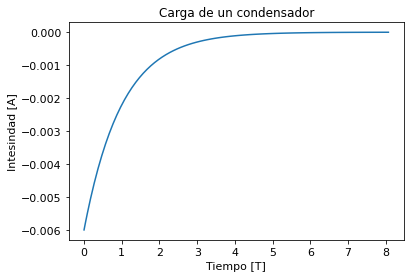

In [40]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.xlabel("Tiempo [T]") 
plt.ylabel("Intesindad [A]") 
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Una etiqueta")
plt.show()

> **Pregunta:** Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne `V1`. ¿Por qué son *opuestas*? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). Algo de ayuda [aquí](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.set_matplotlib_formats). ¿Qué valores devuelve el análisis de tipo `.op`? Justifícalo.

## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo: 

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

> **Pregunta:** Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. [Aquí](https://matplotlib.org/gallery/api/two_scales.html) tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos). 